In [59]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from haversine import haversine

In [60]:
df = pd.read_csv("/Users/juhong/Library/CloudStorage/OneDrive-아주대학교/대학교/3학년 2학기/캡스톤/DUI-traffic-stop-recommendation/bar_list.csv",encoding="CP949")

In [61]:
df

,Unnamed: 0,지번주소,도로명주소,사업장명,위도,경도
0,0,서울특별시 강남구 신사동 525-13 지상1층101102호,서울특별시 강남구 압구정로4길 13-13 (신사동지상1층101102호),르포트 13,37.522346,127.018259
1,1,서울특별시 강남구 삼성동 150-21번지 지상1층,서울특별시 강남구 삼성로104길 7 (삼성동지상1층),한탕,37.510909,127.052322
2,2,서울특별시 강남구 논현동 242-21 삼아프라자,서울특별시 강남구 선릉로129길 3-6 삼아프라자 1층 101호 (논현동),묵호일식,37.515947,127.038082
3,3,서울특별시 강남구 청담동 95-15번지 지상2층,서울특별시 강남구 압구정로72길 22 지상2층 (청담동),볼트스테이크하우스(Vault steak house),37.525020,127.042083
4,4,서울특별시 강남구 역삼동 817-21 지상1층,서울특별시 강남구 강남대로96길 17 (역삼동지상1층),용용선생 강남역점,37.500139,127.025509
...,...,...,...,...,...,...
498,498,서울특별시 강남구 신사동 623-2번지,서울특별시 강남구 언주로 841 (신사동),산봉면옥,37.525560,127.030005
499,499,서울특별시 강남구 개포동 14-1번지 207-3호,서울특별시 강남구 개포로109길 34 (개포동207-3호),클린턴광장,37.494216,127.074727
500,500,서울특별시 강남구 논현동 240-4번지 지하1층,서울특별시 강남구 학동로 330 (논현동지하1층),리더스,37.516154,127.036136
501,501,서울특별시 강남구 논현동 234-1,서울특별시 강남구 논현로114길 8 지하1층 (논현동),갤럭시 펍,37.508518,127.031186


In [62]:
points = df[['위도','경도']]

In [63]:
points.head()

,위도,경도
0,37.522346,127.018259
1,37.510909,127.052322
2,37.515947,127.038082
3,37.525020,127.042083
4,37.500139,127.025509


In [64]:
points.columns = ["x","y"]

In [65]:
sns.set_palette("Set2")

<AxesSubplot:xlabel='x', ylabel='y'>

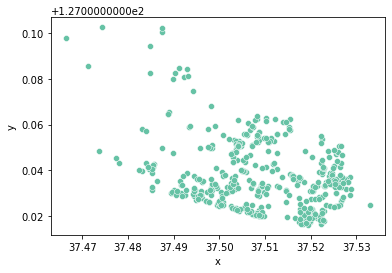

In [66]:
sns.scatterplot(x="x",y="y",data=points,palette="Set2")

In [67]:
#inf로 된 결측치 제거 3개
points.replace([np.inf],np.nan,inplace=True)

/var/folders/d2/20dks6yj46b_077x0h5fmr740000gn/T/ipykernel_1538/1620305212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points.replace([np.inf],np.nan,inplace=True)


In [68]:
points.dropna(subset=["x","y"],how="all",inplace = True)

/var/folders/d2/20dks6yj46b_077x0h5fmr740000gn/T/ipykernel_1538/292313200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points.dropna(subset=["x","y"],how="all",inplace = True)


In [69]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)

KMeans(n_clusters=5)

In [76]:
result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()

,x,y,cluster
0,37.522346,127.018259,4
1,37.510909,127.052322,2
2,37.515947,127.038082,0
3,37.525020,127.042083,0
4,37.500139,127.025509,1


<AxesSubplot:xlabel='x', ylabel='y'>

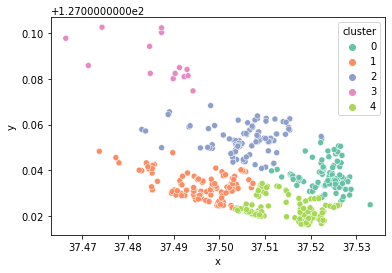

In [77]:
sns.scatterplot(x="x",y="y",hue="cluster",data=result_by_sklearn,palette="Set2")

In [89]:
#결측치로 제거된 index를 고려하여 재배열
result_by_sklearn = result_by_sklearn.reset_index()
result_by_sklearn = result_by_sklearn[['x','y','cluster']]
result_by_sklearn

,x,y,cluster
0,37.522346,127.018259,4
1,37.510909,127.052322,2
2,37.515947,127.038082,0
3,37.525020,127.042083,0
4,37.500139,127.025509,1
...,...,...,...
495,37.525560,127.030005,0
496,37.494216,127.074727,3
497,37.516154,127.036136,0
498,37.508518,127.031186,4


In [96]:
kmeans.cluster_centers_

array([[ 37.52356583, 127.0370047 ],
       [ 37.49599688, 127.03300998],
       [ 37.50546458, 127.05343608],
       [ 37.48571869, 127.08811126],
       [ 37.5150582 , 127.02271697]])

In [91]:
centers = kmeans.cluster_centers_

#cluster의 center에서 가장 먼 거리에 있는 point뽑기
dist_points = [math.inf for i in range(500)]

#모든 centroid부터의 거리가 주어지므로 가장 짧은 거리를 선택(자신이 속하는 cluster의 centroid와의 거리)
for i,location in result_by_sklearn.iterrows():
    for j in range(5): #cluster의 수만큼
        center = tuple(centers[j])
        point = (location['x'],location['y'])
        dist_points[i] = min(dist_points[i],haversine(center,point)*1000)

#np array type의 distance를 pandas series로 변환
dist_points = pd.DataFrame(dist_points,columns = ['dist'])
dist_points

(37.523565833709675, 127.03700470241935) (37.51090873, 127.0523223)
(37.49599688256, 127.03300998) (37.51090873, 127.0523223)
(37.505464585, 127.05343608235295) (37.51090873, 127.0523223)
(37.485718694285715, 127.08811126428571) (37.51090873, 127.0523223)
(37.515058198296295, 127.02271696888889) (37.51090873, 127.0523223)


,dist
0,900.737859
1,613.282280
2,852.503496
3,476.134919
4,806.227994
...,...
495,655.925630
496,1512.376563
497,827.766708
498,1042.555458


In [83]:
result_plus_dist = pd.concat([result_by_sklearn,dist_points],axis=1)
result_plus_dist

,x,y,cluster,dist
0,37.522346,127.018259,4,900.737859
1,37.510909,127.052322,2,613.282280
2,37.515947,127.038082,0,852.503496
3,37.525020,127.042083,0,476.134919
4,37.500139,127.025509,1,806.227994
...,...,...,...,...
495,37.525560,127.030005,0,655.925630
496,37.494216,127.074727,3,1512.376563
497,37.516154,127.036136,0,827.766708
498,37.508518,127.031186,4,1042.555458


In [84]:
#cluster를 기준으로 sorting
result_plus_dist = result_plus_dist.sort_values(by='cluster')
result_plus_dist = result_plus_dist.reset_index()
type(result_plus_dist)

pandas.core.frame.DataFrame

In [85]:
#cluster의 radius가 될 각 cluster별 max_distance 뽑기
max_distance = [0 for i in range(5)]

for i,data in result_plus_dist.iterrows():
    max_distance[int(data['cluster'])] = max(max_distance[int(data['cluster'])],data['dist'])
    

max_distance

[1490.2230243074969,
 2827.4790339613473,
 2528.8103250781583,
 2314.57909345091,
 1234.69386124966]

In [87]:
result_plus_dist.to_csv('/Users/juhong/Library/CloudStorage/OneDrive-아주대학교/대학교/3학년 2학기/캡스톤/DUI-traffic-stop-recommendation/k_means/points_denoted_cluster_dist.csv',encoding ='cp949')

In [95]:
for i,data in result_plus_dist.iterrows():
    if(int(data['dist'])==2827):
        print(i,data)
        for j in range(5):
            print(haversine(centers[j],(data['x'],data['y'])))

139 index       187.000000
x            37.473684
y           127.048379
cluster       1.000000
dist       2827.479034
Name: 139, dtype: float64
5.6366153475062655
2.8274790339613474
3.561857792007911
3.752672830120366
5.127482261084931
